In [38]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.applications.xception import decode_predictions 

In [39]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7f40300539d0>>


In [40]:
path_list={
           "photos/keyboard.jpg","photos/banana.jpg",
           "photos/telecontrol.jpg",
           "photos/bottle.jpg","photos/lemon.jpg",
           "photos/chair.jpg",
           "photos/cat.jpg","photos/monitor.jpg",
           "photos/mouse.jpg","photos/sunglasses.jpg"}

For photos/mouse.jpg: [[('n03793489', 'mouse', 0.98110276), ('n03127747', 'crash_helmet', 0.0035420603), ('n03840681', 'ocarina', 0.0023371736), ('n03908714', 'pencil_sharpener', 0.001583612), ('n03929660', 'pick', 0.00093522883)]]
For photos/sunglasses.jpg: [[('n04356056', 'sunglasses', 0.44444776), ('n04355933', 'sunglass', 0.38734454), ('n03950228', 'pitcher', 0.035715837), ('n02892767', 'brassiere', 0.0067659854), ('n04398044', 'teapot', 0.005380452)]]
For photos/telecontrol.jpg: [[('n04074963', 'remote_control', 0.9872285), ('n03485407', 'hand-held_computer', 0.0012697255), ('n02992529', 'cellular_telephone', 0.0010586614), ('n04041544', 'radio', 0.0008186093), ('n03777754', 'modem', 0.00040902858)]]
For photos/bottle.jpg: [[('n04557648', 'water_bottle', 0.9548291), ('n03825788', 'nipple', 0.0103669735), ('n04560804', 'water_jug', 0.0063641667), ('n04286575', 'spotlight', 0.003132989), ('n03916031', 'perfume', 0.0014438629)]]
For photos/keyboard.jpg: [[('n03085013', 'computer_keyb

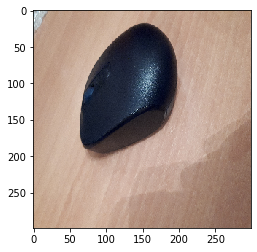

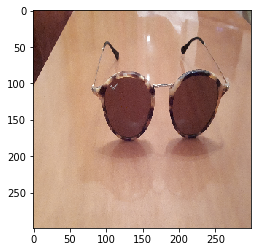

In [41]:
import requests

#Loop for visualization of our 10 images
for path in path_list:
    
    IMAGE_PATH=path
    img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
    img=tf.keras.preprocessing.image.img_to_array(img)
    #view the image
    plt.figure()
    plt.imshow(img/255.)
    
    #fetching labels from Imagenet  
    response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
    imgnet_map=response.json()
    imgnet_map={v[1]:k for k, v in imgnet_map.items()}
    
    #make model predictions
    img=tf.keras.applications.xception.preprocess_input(img)
    predictions=model.predict(np.array([img]))
    print("For "+ str(path) + ": " + str(decode_predictions(predictions,top=5)))
    print("=============================================================")